In [11]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [12]:
digits = load_digits()

In [13]:
dir (digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
X = digits.data
y = digits.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Evaluating Different Models & Their Scores
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9444444444444444

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5530231593090225

In [18]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9861111111111112

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9694444444444444

In [20]:
# Kfold Method
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [21]:
for tran_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(tran_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [22]:
# Function to get the score from all models one by one
def getscore(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [23]:
# Implementation of Functions
getscore(LogisticRegression(max_iter=1000), X_train, X_test, y_train, y_test)

0.9444444444444444

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# For Logistics Regression
lr = LogisticRegression(max_iter=1000)
cross_val_score(lr, X, y, cv=3)

array([0.91986644, 0.94323873, 0.91652755])

In [26]:
# Linear Regression
lir = LinearRegression()
cross_val_score(lir, X, y, cv=3)

array([0.52105031, 0.56814242, 0.41943985])

In [27]:
# Support Vector Machine
svm = SVC()
cross_val_score(svm, X, y, cv=3)

array([0.96494157, 0.97996661, 0.96494157])

In [28]:
# Random Forest
rf = RandomForestClassifier()
cross_val_score(rf, X, y, cv=3)

array([0.93989983, 0.95325543, 0.92654424])

Mean() to calculate Average Calue

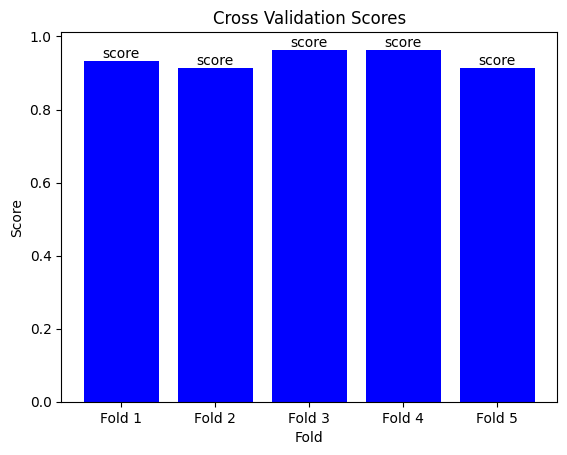

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

rf = RandomForestClassifier()
categories = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
scores = cross_val_score(rf, X,y, cv=5)

plt.bar(categories, scores, width=0.8, color='blue')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross Validation Scores')

for i, score in enumerate(scores):
  plt.text(i, score, "score", ha='center', va='bottom')

plt.show()

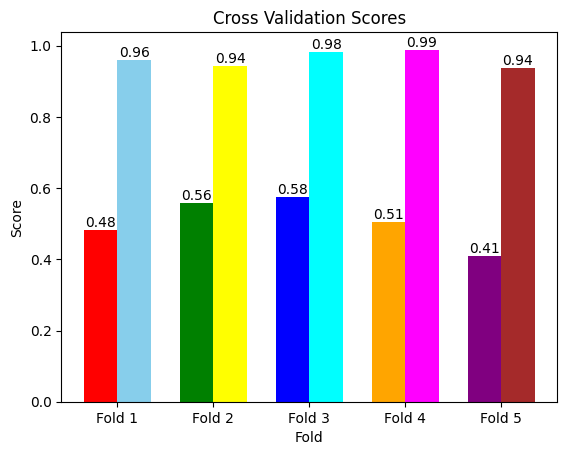

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


digits = load_digits()
X = digits.data
y = digits.target


categories = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
score1 = cross_val_score(lir, X, y, cv=5)
score2 = cross_val_score(svm, X, y, cv=5)


x = np.arange(len(categories))
bar_width = 0.35

colors1 = ['red', 'green', 'blue', 'orange', 'purple']
colors2 = ['skyblue', 'yellow', 'cyan', 'magenta', 'brown']


for i in range(len(categories)):
    plt.bar(x[i] - bar_width / 2, score1[i], width=bar_width, color=colors1[i])
    plt.bar(x[i] + bar_width / 2, score2[i], width=bar_width, color=colors2[i])


plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross Validation Scores')
plt.xticks(x, categories)


for i, score in enumerate(score1):
  plt.text(i - bar_width / 2, score, f'{score:.2f}', ha='center', va='bottom')

for i, score in enumerate(score2):
  plt.text(i + bar_width / 2, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()